In [1]:
%load_ext autoreload
%autoreload 2
from util import *
from ArcExpression import get_Arc_expression, normalize_IEG, get_all_IEG
from Statistics import *

from scipy import stats
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\vision\Anaconda3\envs\HTM\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
proj_meta = load_meta()

In [3]:
tone_resp_early = [np.hstack(tone_responses(proj_meta, site, 3, 20, 80))
             for site in range(9)]

tone_resp_late = [np.hstack(tone_responses(proj_meta, site, 13, 20, 80))
             for site in range(9)]

In [4]:
mean_early = np.vstack([np.mean(tone_resp_early[k], axis=1) for k in range(9)])
mean_late = np.vstack([np.mean(tone_resp_late[k], axis=1) for k in range(9)])

In [5]:
mean_early = elemwise_subtract(mean_early, np.mean(mean_early[:,10:19], axis=1))
mean_late = elemwise_subtract(mean_late, np.mean(mean_late[:,10:19], axis=1))

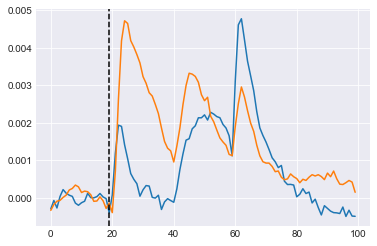

In [6]:
plt.plot(np.mean(mean_early, axis=0))
plt.plot(np.mean(mean_late, axis=0))
plt.axvline(19, color='k', linestyle='--')

## Stimulus Responses (Fig 4B)

### Tone

Text(0.5,1,'Tone (population average)')

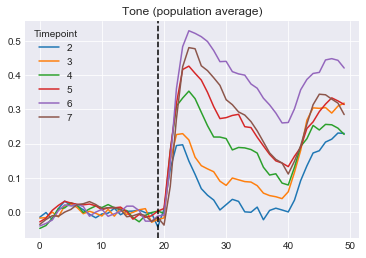

In [18]:
# figsize(10,4)
tps = [3,5,7,9, 11,13]
for ind in range(len(tps)):
    grat_resps = []
    for site in range(9):
        try:
            grat_resps.append(
            np.nanmean(mean_subtract(
                act_responses(proj_meta, site, tps[ind], "ToneID", 20, 30)
            ,10, 18), axis=1))
        except:
            pass
    plt.plot(100*np.nanmean(np.vstack(grat_resps), axis=0),
            label="{}".format(np.int32((tps[ind]+1)/2)))

plt.legend(title="Timepoint")
plt.axvline(20-1, color="k", linestyle="--")
plt.title("Tone (population average)")


### Reward Onset

In [12]:
figsize(10,4)
tps = [3,5, 11,13]
for ind in range(len(tps)):
    grat_resps = []
    for site in range(9):
        try:
            grat_resps.append(np.vstack((
            np.nanmean(mean_subtract(
                act_responses(proj_meta, site, tps[ind], "RewardL", 20, 30),
            14,18), axis=1),
            np.nanmean(mean_subtract(
                act_responses(proj_meta, site, tps[ind], "RewardR", 20, 30),
            14,18), axis=1)))
                             )             
        except:
            pass
    plt.plot(np.nanmean(np.vstack(grat_resps), axis=0), 
             label="{}".format(np.int32(tps[ind]+1)/2))

plt.legend()
plt.axvline(20-1, color="k", linestyle="--")
plt.title("Reward (population average)");
plt.show()

### Air Puff 

Text(0.5,1,'Air puff (population average).... NOT!!!')

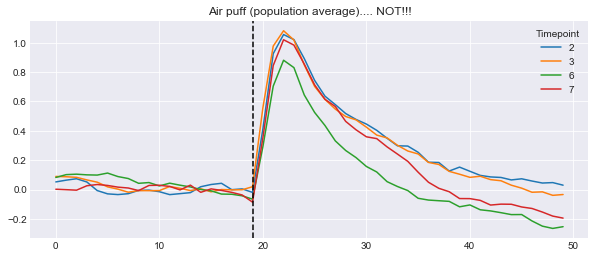

In [6]:
figsize(10,4)
tps = [3,5, 11,13]
for ind in range(len(tps)):
    grat_resps = []
    for site in range(9):
        try:
            grat_resps.append(
            np.nanmean(mean_subtract(
                act_responses(proj_meta, site, tps[ind], "AirPuff", 20, 30)
            ,10, 19), axis=1))
        except:
            pass
    plt.plot(100*np.nanmean(np.vstack(grat_resps), axis=0),
            label="{}".format(np.int32((tps[ind]+1)/2)))

plt.legend(title="Timepoint")
plt.axvline(20-1, color="k", linestyle="--")
plt.title("Air puff (population average).... NOT!!!")

### Grating Onset

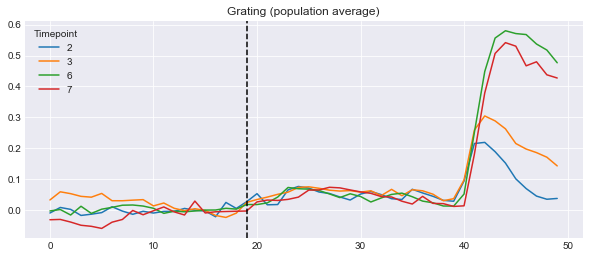

In [7]:
figsize(10,4)
tps = [3,5, 11,13]
for ind in range(len(tps)):
    grat_resps = []
    for site in range(9):
        try:
            grat_resps.append(
            np.nanmean(mean_subtract(
                act_responses(proj_meta, site, tps[ind], "GratID", 20, 30)
            ,10, 19), axis=1))
        except:
            pass
    plt.plot(100*np.nanmean(np.vstack(grat_resps), axis=0),
            label="{}".format(np.int32((tps[ind]+1)/2)))

plt.legend(title="Timepoint")
plt.axvline(20-1, color="k", linestyle="--")
plt.title("Grating (population average)");

### Why is it so low??

## Changes in preference

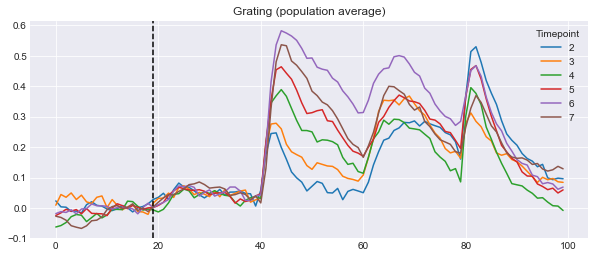

In [7]:
figsize(10,4)
tps = [3, 5, 7, 9, 11, 13]
cum_resps = []
for ind in range(len(tps)):
    grat_resps = []
    for site in range(9):
        try:
            grat_resps.append(
            np.nanmean(mean_subtract(
                act_responses(proj_meta, site, tps[ind], "ToneID", 40, 60)
            ,10, 19), axis=1))
        except:
            print(site)
            pass
    plt.plot(100*np.nanmean(np.vstack(grat_resps), axis=0),
            label="{}".format(np.int32((tps[ind]+1)/2)))
    
    cum_resps.append(np.vstack(grat_resps))

plt.legend(title="Timepoint")
plt.axvline(20-1, color="k", linestyle="--")
plt.title("Grating (population average)");

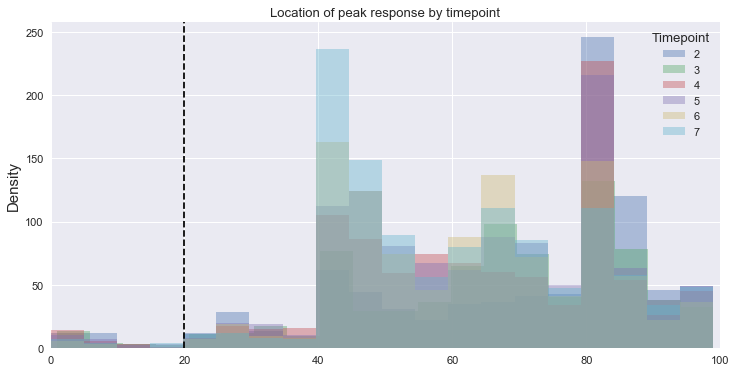

In [207]:
sns.set(font_scale=1.1)
plt.figure(figsize=(12,6))
for ind in range(6):
    tmpind = np.argmax(cum_resps[ind], axis=1)
    tmp_min = np.max(cum_resps[ind], axis=1)
    tmpind = tmpind[tmp_min >= 0.015]
    sns.distplot(tmpind, 
                 kde=False,
                 bins=20,
                 label="{}".format(ind+2))
plt.xlim((0, 100))
plt.ylabel("Density", fontsize=15)
plt.legend(title="Timepoint")
plt.axvline(20, color="k", linestyle="--", label="grating onset")

plt.title("Location of peak response by timepoint");

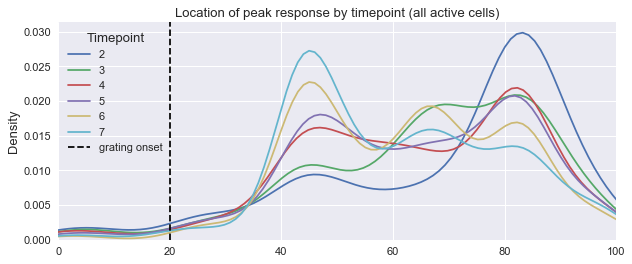

In [225]:
sns.set(font_scale=1.1)
for ind in range(6):
    tmpind = np.argmax(cum_resps[ind], axis=1)
    tmp_min = np.max(cum_resps[ind], axis=1)
    tmpind = tmpind[tmp_min >= 0.015] # df/f threshold
    sns.distplot(tmpind, 
                 hist=False,
                 label="{}".format(ind+2),
                 )
plt.xlim((0, 100))
plt.ylabel("Density", fontsize=13)
plt.axvline(20, color="k", linestyle="--", label="grating onset")
plt.legend(title="Timepoint")
plt.title("Location of peak response by timepoint (all active cells)");

In [11]:
peak_vec = []
thresh = 0.015
for ind in range(6):
    tmpind = np.argmax(cum_resps[ind], axis=1)
    ind_vec = np.full(tmpind.shape, np.nan)
    tmp_min = np.max(cum_resps[ind], axis=1)
    ind_vec[tmp_min >= thresh] = tmpind[tmp_min >= thresh]
    
    peak_vec.append(ind_vec)

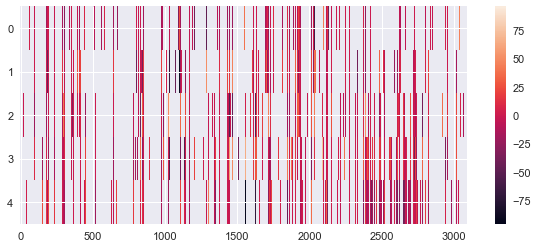

In [12]:
tmp = np.diff(peak_vec, axis=0)
imagesc(np.diff(peak_vec, axis=0))
plt.colorbar();

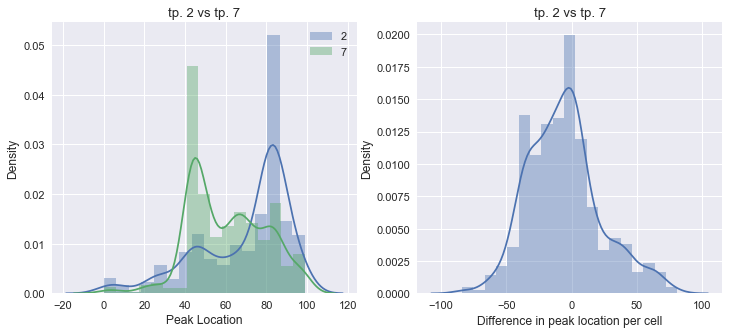

In [13]:
plt.figure(figsize=(12,5))
ind = 0

plt.subplot(1,2,1)
sns.distplot(peak_vec[ind][~np.isnan(peak_vec[ind])], label="{}".format(ind+2))
sns.distplot(peak_vec[5][~np.isnan(peak_vec[5])], label="{}".format(7))
plt.xlabel("Peak Location")
plt.ylabel("Density")
plt.legend()
plt.title("tp. {} vs tp. 7".format(ind+2));

plt.subplot(1,2,2)
tmp = np.diff((peak_vec[ind], peak_vec[5]), axis=0)
tmp_plot = tmp[~ np.isnan(tmp)]
sns.distplot(tmp_plot)
plt.title("tp. {} vs tp. 7".format(ind+2))
plt.xlabel("Difference in peak location per cell")
plt.ylabel("Density");

In [438]:
# trace = BEST(peak_vec[0][~np.isnan(peak_vec[0])],
#              peak_vec[1][~np.isnan(peak_vec[1])],
#              variational=False)
# posterior_plots(trace[0])

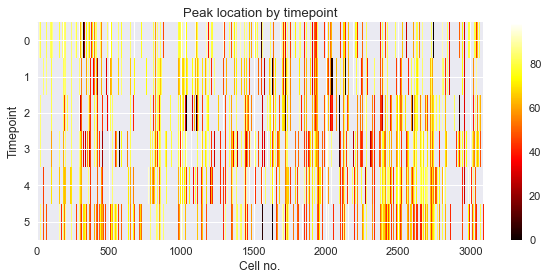

In [14]:
imagesc(peak_vec, cmap="hot")
plt.title("Peak location by timepoint")
plt.xlabel("Cell no.")
plt.ylabel("Timepoint")
plt.colorbar();

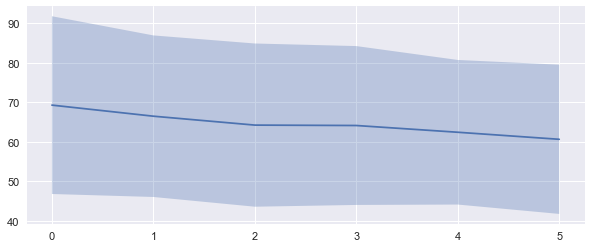

In [15]:
pv = np.asarray(peak_vec)
mn = np.nanmean(pv, axis=1)
sd = np.nanstd(pv, axis=1)
x = np.arange(len(mn))
plt.fill_between(x, mn-sd, mn+sd, alpha=0.3)
plt.plot(x, mn)

### IEG levels as a function of peak shift

In [97]:
all_Arc, all_cFos = get_all_IEG(proj_meta)
arc_size = np.sum([act2mat(proj_meta, site, 1).shape[0] for site in range(4)])
cFos_size = np.sum([act2mat(proj_meta, site, 1).shape[0] for site in range(4,9)])

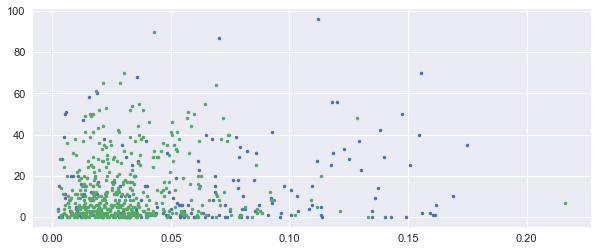

In [140]:
tmp = np.diff((peak_vec[2][:arc_size], peak_vec[3][:arc_size]), axis=0).squeeze()
tmp2 = np.diff((peak_vec[2][arc_size:], peak_vec[3][arc_size:]), axis=0).squeeze()

plt.plot(all_Arc[3], np.abs(tmp),'.')
plt.plot(all_cFos[3], np.abs(tmp2),'.')

### IEG Level vs absolute difference

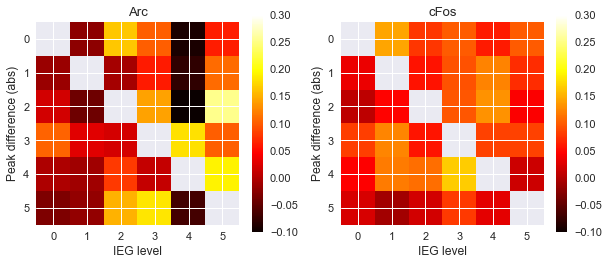

In [144]:
corr_Arc = np.zeros((len(all_Arc), len(all_Arc)))
corr_cFos = np.zeros_like(corr_Arc)
for ind in range(len(all_Arc)):
    for knd in range(len(all_Arc)):

        tmp = np.diff((peak_vec[ind][:arc_size], peak_vec[knd][:arc_size]), axis=0).squeeze()
        tmp2 = np.diff((peak_vec[ind][arc_size:], peak_vec[knd][arc_size:]), axis=0).squeeze()

        tmp_df = pd.DataFrame([all_Arc[ind], np.abs(tmp)])
        tmp_df2 = pd.DataFrame([all_cFos[ind], np.abs(tmp2)])

        corr_Arc[ind, knd] = tmp_df.T.corr()[0][1]
        corr_cFos[ind, knd] = tmp_df2.T.corr()[0][1]

plt.subplot(1,2,1)
plt.imshow(corr_Arc.T, cmap="hot", clim=(-0.1, 0.3))
plt.title("Arc")
plt.colorbar()
plt.xlabel("IEG level")
plt.ylabel("Peak difference (abs)")

plt.subplot(1,2,2)
plt.imshow(corr_cFos.T, cmap="hot", clim=(-0.1, 0.3))
plt.title("cFos")
plt.colorbar()
plt.xlabel("IEG level")
plt.ylabel("Peak difference (abs)");

### IEG Level vs relative difference

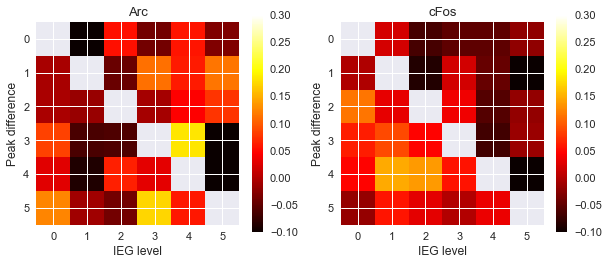

In [146]:
corr_Arc = np.zeros((len(all_Arc), len(all_Arc)))
corr_cFos = np.zeros_like(corr_Arc)
for ind in range(len(all_Arc)):
    for knd in range(len(all_Arc)):

        tmp = np.diff((peak_vec[ind][:arc_size], peak_vec[knd][:arc_size]), axis=0).squeeze()
        tmp2 = np.diff((peak_vec[ind][arc_size:], peak_vec[knd][arc_size:]), axis=0).squeeze()

        tmp_df = pd.DataFrame([all_Arc[ind], (tmp)])
        tmp_df2 = pd.DataFrame([all_cFos[ind], (tmp2)])

        corr_Arc[ind, knd] = tmp_df.T.corr()[0][1]
        corr_cFos[ind, knd] = tmp_df2.T.corr()[0][1]
       
plt.subplot(1,2,1)
plt.imshow(corr_Arc.T, cmap="hot", clim=(-0.1, 0.3))
plt.title("Arc")
plt.colorbar()
plt.xlabel("IEG level")
plt.ylabel("Peak difference")

plt.subplot(1,2,2)
plt.imshow(corr_cFos.T, cmap="hot", clim=(-0.1, 0.3))
plt.title("cFos")
plt.colorbar()
plt.xlabel("IEG level")
plt.ylabel("Peak difference");

###  IEG Level Change vs relative Peak shift

In [151]:
all_Arc, all_cFos = get_all_IEG(proj_meta, keep_res=True)
arc_size = np.sum([act2mat(proj_meta, site, 1).shape[0] for site in range(4)])
cFos_size = np.sum([act2mat(proj_meta, site, 1).shape[0] for site in range(4,9)])

Have ye no shame?


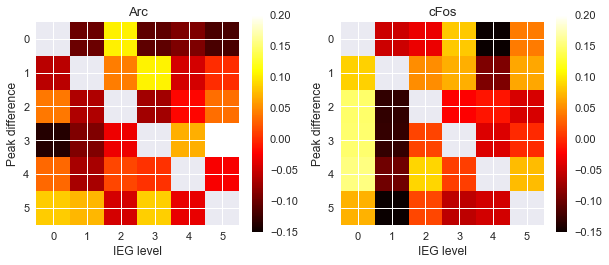

In [203]:
corr_Arc = np.zeros((len(all_Arc), len(all_Arc)))
corr_cFos = np.zeros_like(corr_Arc)
for ind in range(len(all_Arc)):
    for knd in range(len(all_Arc)):

        tmp = np.diff((peak_vec[ind][:arc_size], peak_vec[knd][:arc_size]), axis=0).squeeze()
        tmp2 = np.diff((peak_vec[ind][arc_size:], peak_vec[knd][arc_size:]), axis=0).squeeze()

        arc_change = np.diff((all_Arc[ind][:,0], all_Arc[ind][:,5]), axis=0).squeeze()
        cfos_change = np.diff((all_cFos[ind][:,0], all_cFos[ind][:,5]), axis=0).squeeze()
        
        tmp_df = pd.DataFrame([arc_change, (tmp)])
        tmp_df2 = pd.DataFrame([cfos_change, (tmp2)])

        corr_Arc[ind, knd] = tmp_df.T.corr()[0][1]
        corr_cFos[ind, knd] = tmp_df2.T.corr()[0][1]
       
plt.subplot(1,2,1)
plt.imshow(corr_Arc.T, cmap="hot", clim=(-0.15, 0.2))
plt.title("Arc")
plt.colorbar()
plt.xlabel("IEG level")
plt.ylabel("Peak difference")

plt.subplot(1,2,2)
plt.imshow(corr_cFos.T, cmap="hot", clim=(-0.15, 0.2))
plt.title("cFos")
plt.colorbar()
plt.xlabel("IEG level")
plt.ylabel("Peak difference");

###  IEG Level Change vs absolute Peak shift

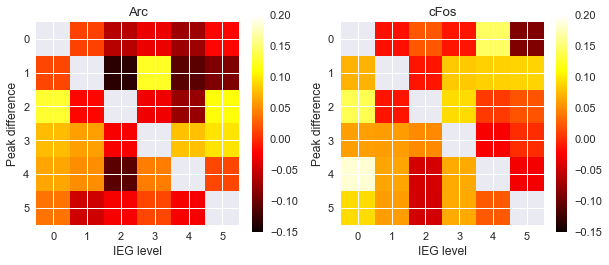

In [204]:
corr_Arc = np.zeros((len(all_Arc), len(all_Arc)))
corr_cFos = np.zeros_like(corr_Arc)
for ind in range(len(all_Arc)):
    for knd in range(len(all_Arc)):

        tmp = np.diff((peak_vec[ind][:arc_size], peak_vec[knd][:arc_size]), axis=0).squeeze()
        tmp2 = np.diff((peak_vec[ind][arc_size:], peak_vec[knd][arc_size:]), axis=0).squeeze()

        arc_change = np.diff((all_Arc[ind][:,0], all_Arc[ind][:,5]), axis=0).squeeze()
        cfos_change = np.diff((all_cFos[ind][:,0], all_cFos[ind][:,5]), axis=0).squeeze()
        
        tmp_df = pd.DataFrame([arc_change, np.abs(tmp)])
        tmp_df2 = pd.DataFrame([cfos_change, np.abs(tmp2)])

        corr_Arc[ind, knd] = tmp_df.T.corr()[0][1]
        corr_cFos[ind, knd] = tmp_df2.T.corr()[0][1]
       
plt.subplot(1,2,1)
plt.imshow(corr_Arc.T, cmap="hot", clim=(-0.15, 0.2))
plt.title("Arc")
plt.colorbar()
plt.xlabel("IEG level")
plt.ylabel("Peak difference")

plt.subplot(1,2,2)
plt.imshow(corr_cFos.T, cmap="hot", clim=(-0.15, 0.2))
plt.title("cFos")
plt.colorbar()
plt.xlabel("IEG level")
plt.ylabel("Peak difference");

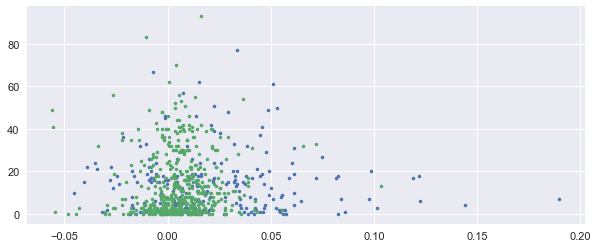

In [224]:
ind, knd = 4, 5
tmp = np.diff((peak_vec[ind][:arc_size], peak_vec[knd][:arc_size]), axis=0).squeeze()
tmp2 = np.diff((peak_vec[ind][arc_size:], peak_vec[knd][arc_size:]), axis=0).squeeze()

arc_change = np.diff((all_Arc[ind][:,0], all_Arc[ind][:,5]), axis=0).squeeze()
cfos_change = np.diff((all_cFos[ind][:,0], all_cFos[ind][:,5]), axis=0).squeeze()
        
plt.plot(arc_change, np.abs(tmp),'.')
plt.plot(cfos_change, np.abs(tmp2),'.')

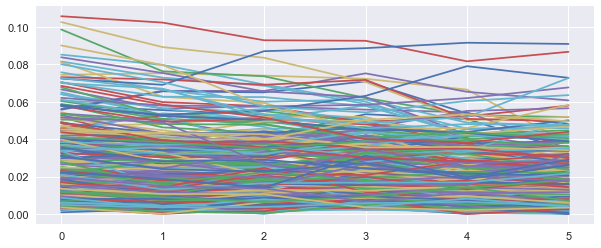

In [46]:
tmp = normalize_IEG(proj_meta, 0, 10)
plt.plot(tmp.T);

Text(0.5,1,'Arc distribution by timepoint')

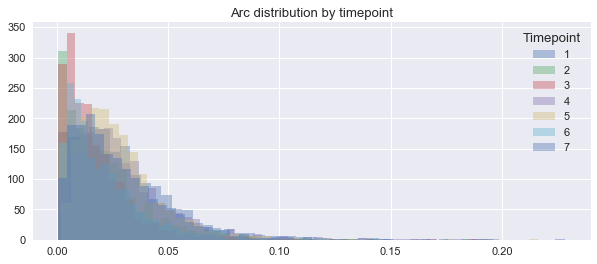

In [54]:
figsize = (16,12)
tps = np.int32(np.linspace(0, 12, 7))
ieg_levs = {}
cnt = 0
ieg_inds = [range(4), range(4,9)]
for cond in range(len(tps)):
    arc_levs = []
#     arc_levs.append(
#             [normalize_Arc(get_Arc_expression(proj_meta, site, tps[cond]))
#             for site in range(4)])
    arc_levs.append([
        normalize_IEG(proj_meta, site, tps[cond]) for site in range(4,9)
    ])
#     ieg_levs[cnt] = np.hstack(np.hstack(np.mean(arc_levs, axis=1)))
    ieg_levs[cnt] = np.mean(np.vstack(np.hstack(arc_levs)), axis=1)

    sns.distplot(ieg_levs[cnt], label="{}".format(cond+1), kde=False)
    cnt += 1

plt.legend(title="Timepoint");
plt.title("Arc distribution by timepoint")

In [134]:
ieg_levs[0].shape

(1271, 6)

In [476]:
np.arange(2,11,2)

array([ 2,  4,  6,  8, 10])

### Interlude: What happens over longer time scales?

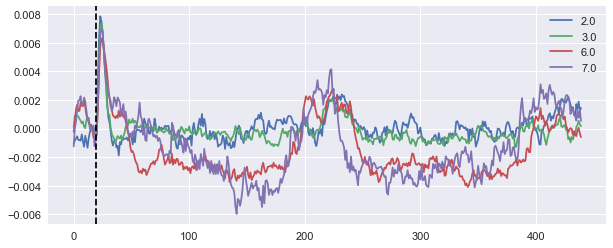

In [460]:
figsize(10,4)
tps = [3,5, 11,13]
for ind in range(len(tps)):
    grat_resps = []
    for site in range(9):
        try:
            grat_resps.append(
            np.nanmean(mean_subtract(
                act_responses(proj_meta, site, tps[ind], "RewardL", 20, 420),
            14,18), axis=1))
        except:
            pass
    plt.plot(np.nanmean(np.vstack(grat_resps), axis=0), 
             label="{}".format(np.int32(tps[ind]+1)/2))

plt.legend()
plt.axvline(20-1, color="k", linestyle="--")